# 2D Grating

This example illustrates the use of A-FMM to calculate reflection and transmission from a 2D grating. 

The calculations shown here are based on the paper: **Lee, Sun-Goo, et al. "Polarization-independent electromagnetically induced transparency-like transmission in coupled guided-mode resonance structures." Applied Physics Letters 110.11 (2017): 111106.** 

## Importing modules

In [43]:
import numpy as np
import matplotlib.pyplot as plt

import A_FMM

# general parameter of calculation 
N = 5  # truncation order for Fourier expansion

## Definition of layers

The structure under investigation is a 2D grating of square dielectric (n=2) pillars on top o two slabs of the same dielectric, all embedded in ait (n=1). The grating is build on a square lattice with lattice constant **a=1**. 

The following code defines the needed layers.

### Patterned layer

This layer is built in the usual way, by defining a Creator object and call one of the pre-defined geometries.

Text(0.5, 1.0, 'xy cross section of the patterned layer')

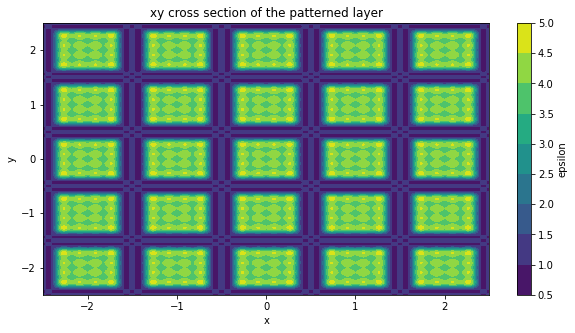

In [44]:
# definition of parameter of layer
w_pc = 0.7

# define the creator and layer
creator = A_FMM.Creator()
creator.rect(eps_core=4.0, eps_clad=1.0, w=w_pc, h=w_pc)
pattern = A_FMM.Layer(Nx=N, Ny=N, creator=creator)

# plotting dielectric constant profile of the layer
x = np.linspace(-2.5, 2.5, 501)
y = np.linspace(-2.5, 2.5, 501)

eps = pattern.calculate_epsilon(x=x, y=y)

fig, ax = plt.subplots(1,1, figsize = (10,5))
contour = ax.contourf(np.squeeze(eps['x']), np.squeeze(eps['y']), np.squeeze(eps['eps'].real))
fig.colorbar(contour, ax=ax, label='epsilon')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('xy cross section of the patterned layer')

### Uniform layers
Since these layer have no patterning they are defined by calling Layer_uniform.

In [45]:
# define uniform layers
background = A_FMM.Layer_uniform(Nx=N, Ny=N, eps=1.0)
dielectric = A_FMM.Layer_uniform(Nx=N, Ny=N, eps=4.0)

## Stack definition

The following code defines the 3D stack.

Text(0.5, 1.0, 'xz cross section of the multilayer')

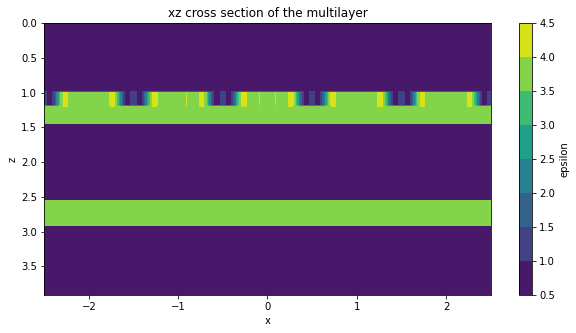

In [46]:
# definition of relevant parameters for the stack (check the paper for parameters' meaning)
t_pc = 0.2
t_1 = 0.25
t_2 = 0.361
h = 1.1

# definition of material and thicknesses lists
layers = [background, pattern, dielectric, background, dielectric, background]
thicknesses = [1.0, t_pc, t_1, h, t_2, 1.0]

# stack definition
stack = A_FMM.Stack(layers=layers, d=thicknesses)

# plotting dielectric constant profile of a cross section of the stack
z = np.linspace(-1.0, 4.0, 501)
eps = stack.calculate_epsilon(x=x, z=z)

fig, ax = plt.subplots(1,1, figsize = (10,5))
contour = ax.contourf(np.squeeze(eps['x']), np.squeeze(eps['z']), np.squeeze(eps['eps'].real))
ax.invert_yaxis()
fig.colorbar(contour, ax=ax, label='epsilon')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_title('xz cross section of the multilayer')

## Transmission calculation

The following code calculates the transmission.

Text(0.5, 1.0, 'TE transmission')

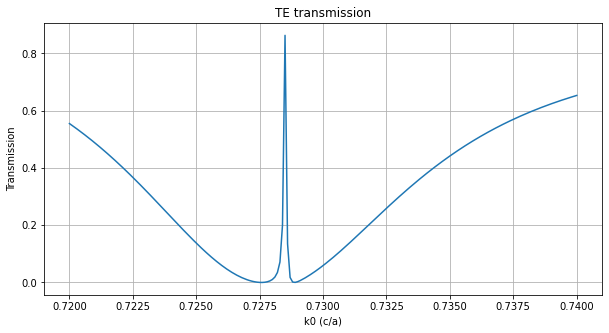

In [47]:
# definition of the array of frequency to be used for the calculation
k0_array = np.linspace(0.72, 0.74, 201)
transmission = []

# loop over the frequencies for calculating transmission
for k0 in k0_array:
    stack.solve(k0=k0)
    transmission.append(stack.get_T(stack.NPW//2, stack.NPW//2, ordered=False))

fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(k0_array, transmission)
ax.set_xlabel('k0 (c/a)')
ax.set_ylabel('Transmission')
ax.grid()
ax.set_title('TE transmission')


**Note**: get_T mode ordering is designed to work for guided modes, so the modes are ordered by decreasing effective index. When the layer involved are uniform and the eigenmodes are plane waves, ordering the modes is not the best strategy, especially for not normal incidence. 
For uniform layers solved with a number **N** of fourier components, one obtains **2N** plane waves. The solutions are divided into to groups: the first **N** have polarization along x, the other have polarization along y. The order 0 sits in the middle of each group. The easy way to obtain the correct mode is to use **layer.NPW//2** if the polarization is along x and **layer.NPW//2 + layer.NPW** if the polarization is along y.

If other orders are needed, check **layer.G**. It is a dictionary linking the modes index with the tuple representing the x and y order. 

In [48]:
print(pattern.G)
print(pattern.NPW//2)

{0: (-5, -5), 1: (-5, -4), 2: (-5, -3), 3: (-5, -2), 4: (-5, -1), 5: (-5, 0), 6: (-5, 1), 7: (-5, 2), 8: (-5, 3), 9: (-5, 4), 10: (-5, 5), 11: (-4, -5), 12: (-4, -4), 13: (-4, -3), 14: (-4, -2), 15: (-4, -1), 16: (-4, 0), 17: (-4, 1), 18: (-4, 2), 19: (-4, 3), 20: (-4, 4), 21: (-4, 5), 22: (-3, -5), 23: (-3, -4), 24: (-3, -3), 25: (-3, -2), 26: (-3, -1), 27: (-3, 0), 28: (-3, 1), 29: (-3, 2), 30: (-3, 3), 31: (-3, 4), 32: (-3, 5), 33: (-2, -5), 34: (-2, -4), 35: (-2, -3), 36: (-2, -2), 37: (-2, -1), 38: (-2, 0), 39: (-2, 1), 40: (-2, 2), 41: (-2, 3), 42: (-2, 4), 43: (-2, 5), 44: (-1, -5), 45: (-1, -4), 46: (-1, -3), 47: (-1, -2), 48: (-1, -1), 49: (-1, 0), 50: (-1, 1), 51: (-1, 2), 52: (-1, 3), 53: (-1, 4), 54: (-1, 5), 55: (0, -5), 56: (0, -4), 57: (0, -3), 58: (0, -2), 59: (0, -1), 60: (0, 0), 61: (0, 1), 62: (0, 2), 63: (0, 3), 64: (0, 4), 65: (0, 5), 66: (1, -5), 67: (1, -4), 68: (1, -3), 69: (1, -2), 70: (1, -1), 71: (1, 0), 72: (1, 1), 73: (1, 2), 74: (1, 3), 75: (1, 4), 76: (1,